<a href="https://colab.research.google.com/github/hassaan806/email-spam-classification/blob/main/email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


# Loading Dataset

In [6]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# Data Cleaning and EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [11]:
df.rename(columns={"v1": "label", "v2": "text"}, inplace=True)

In [12]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df.drop_duplicates(keep="first", inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [18]:
values = df["label"].value_counts()
values

,count
label,
ham,4516
spam,653


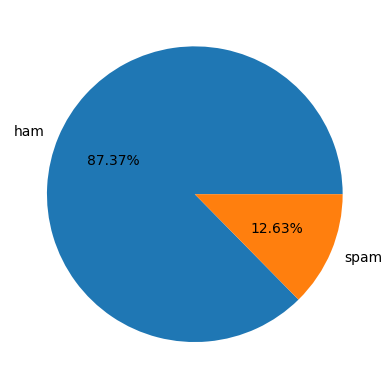

In [19]:
plt.pie(values, labels= ["ham","spam"], autopct="%.2f%%")
plt.show()

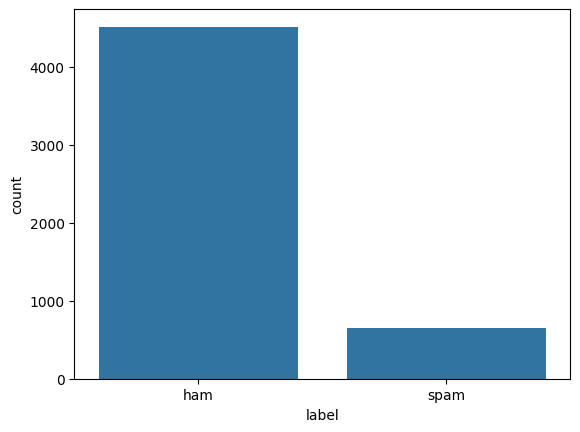

In [21]:
sns.countplot(x = df["label"])
plt.show()

# Feature Engineering

In [22]:
df["num_of_char"] = df["text"].apply(len)
df.head(5)

,label,text,num_of_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,label,text,num_of_char,num_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df["num_of_sentence"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,label,text,num_of_char,num_of_words,num_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[["num_of_char", "num_of_words", "num_of_sentence"]].describe()

,num_of_char,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

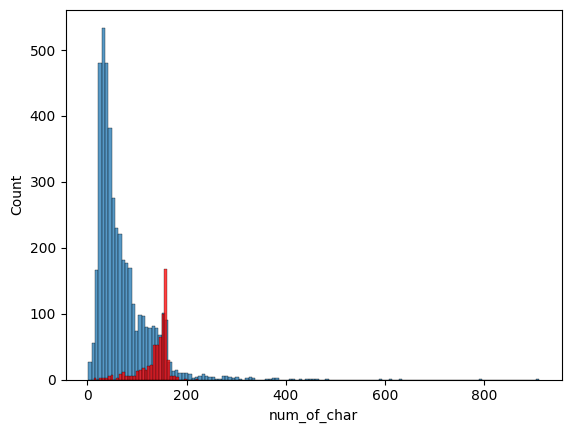

In [31]:
sns.histplot(df[df["label"] == 0]["num_of_char"])
sns.histplot(df[df["label"] == 1]["num_of_char"], color = "red")
plt.show()

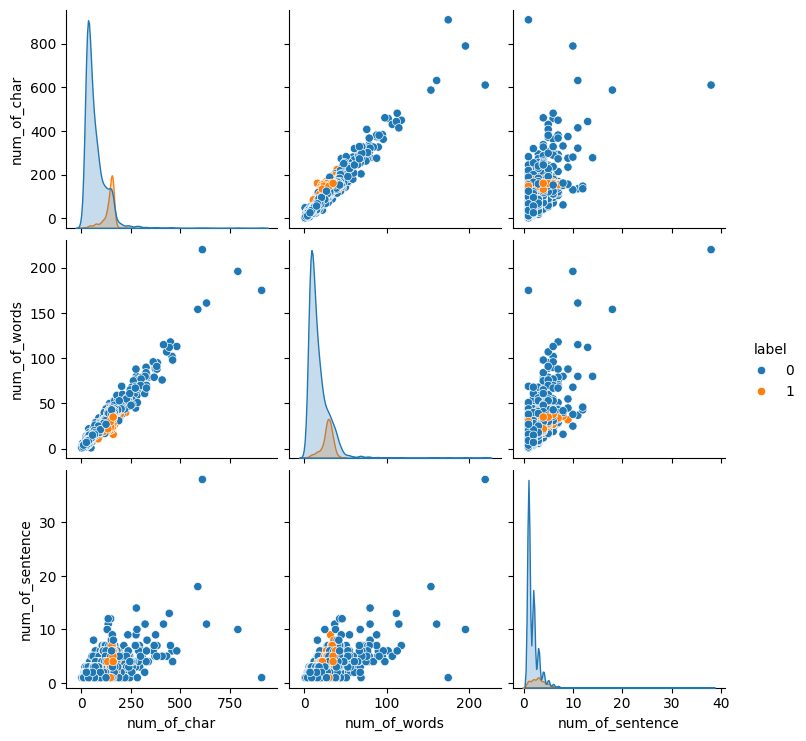

In [33]:
sns.pairplot(df, hue="label")
plt.show()

In [39]:
df1 = df.copy()
df1.drop(["text"], axis=1, inplace=True)
df1.head(5)

,label,num_of_char,num_of_words,num_of_sentence
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


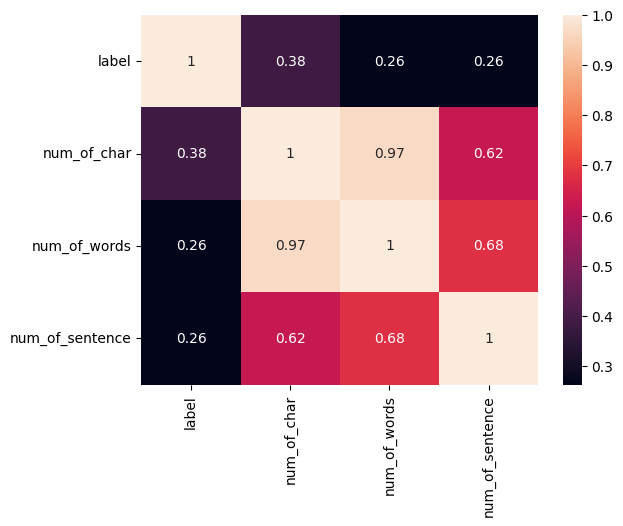

In [40]:
corr = df1.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Text Preprocessing

In [41]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
import re
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [43]:
#define a function to preprocessing text
def tranform_text(text):
  punc = list(punctuation)
  stop = stopwords.words("english")
  bad_token = stop + punc
  token = word_tokenize(text)
  lemma = WordNetLemmatizer()
  word_token = [t for t in token if t.isalpha()]
  clean_token = [lemma.lemmatize(t.lower()) for t in word_token if t not in bad_token]
  return ' '.join(clean_token)

In [44]:
df["transformed_text"] = df["text"].apply(tranform_text)
df.head(5)

,label,text,num_of_char,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think go usf life around though


In [45]:
from wordcloud import WordCloud

In [46]:
ham_word = ' '.join(word for word in df[df["label"]== 0]["transformed_text"])

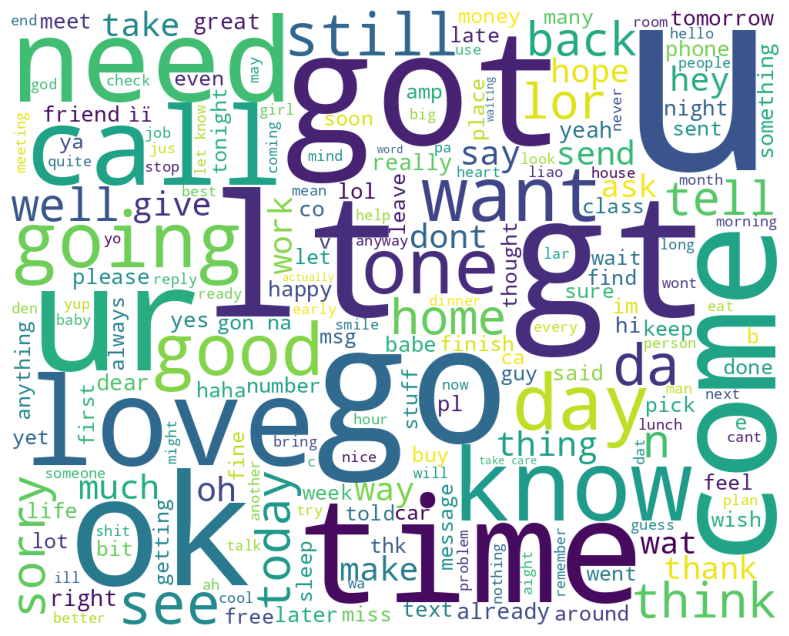

In [47]:
wordcloud = WordCloud(
    height=800,
    width=1000,
    background_color="white"
).generate(ham_word)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

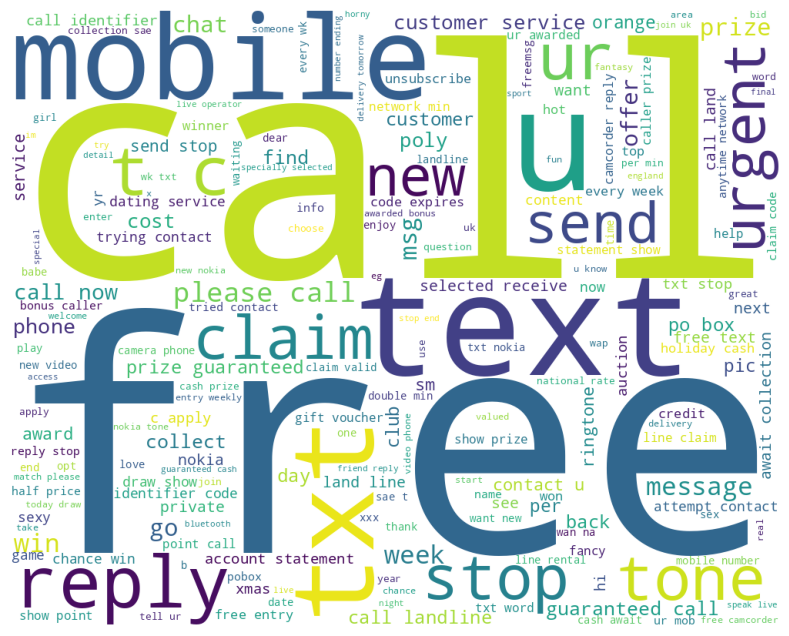

In [49]:
spam_word = ' '.join(word for word in df[df["label"]==1]["transformed_text"])
wordcloud = WordCloud(
    height=800,
    width=1000,
    background_color="white"
).generate(spam_word)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Model Building

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [54]:
x = df["transformed_text"]
y = df["label"]

In [55]:
X = vectorizer.fit_transform(x).toarray()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Gaussian NB

In [58]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [59]:
y_pred = model.predict(x_test)

Accuracy Score for Gaussian: 0.879110251450677
Precision Score for Gaussian: 0.5462962962962963


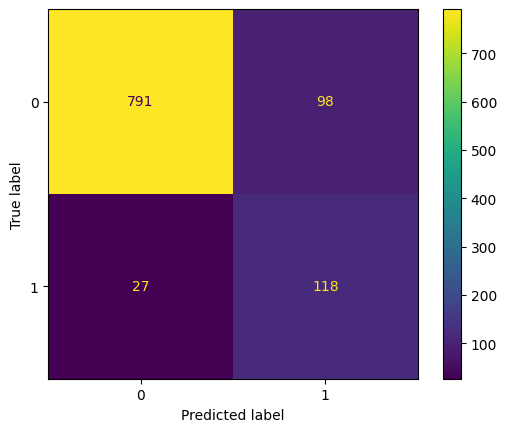

In [60]:
#defining a function to visualize and calculate model results
def evaluation(name, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  t1 = ConfusionMatrixDisplay(cm)
  print(f"Accuracy Score for Gaussian: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score for Gaussian: {precision_score(y_test, y_pred)}")
  t1.plot()

evaluation("Classification", y_test, y_pred)

# Multinomial NB

In [61]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [62]:
y_pred = mnb.predict(x_test)

Accuracy Score for Multinomial: 0.960348162475822
Precision Score for Multinomial: 0.9905660377358491


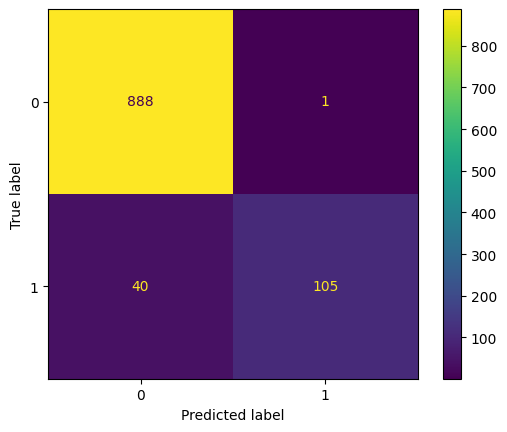

In [63]:
#defining a funtion to visualize and calculate model result
def evaluation(name, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  t1 = ConfusionMatrixDisplay(cm)
  print(f"Accuracy Score for Multinomial: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score for Multinomial: {precision_score(y_test, y_pred)}")
  t1.plot()

evaluation("Classification", y_test, y_pred)

# Bernoulli NB

In [64]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [65]:
y_pred = model.predict(x_test)

Accuracy Score for Bernoulli: 0.9642166344294004
Precision Score for Bernoulli: 0.9576271186440678


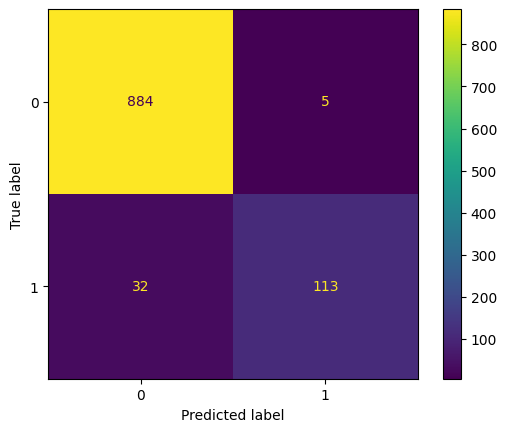

In [66]:
#defining a function to vitualize and calculate the model score
def evaluation(name, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  t1 = ConfusionMatrixDisplay(cm)
  print(f"Accuracy Score for Bernoulli: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score for Bernoulli: {precision_score(y_test, y_pred)}")
  t1.plot()

evaluation("Classification", y_test, y_pred)

# Trying Random Models

In [67]:
dtf = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
xgc = XGBClassifier()

In [68]:
clfs = {
    'dtf': dtf,
    'lrc': lrc,
    'rfc': rfc,
    'svc': svc,
    'xgc': xgc
}

In [69]:
def train_model(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    curr_accuracy, curr_precision = train_model(clf, x_train, y_train, x_test, y_test)
    print("Model: ", name)
    print("Accuracy Score: ", curr_accuracy)
    print("Precision Score: ", curr_precision)

    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

Model:  dtf
Accuracy Score:  0.9487427466150871
Precision Score:  0.8108108108108109
Model:  lrc
Accuracy Score:  0.9468085106382979
Precision Score:  0.9411764705882353
Model:  rfc
Accuracy Score:  0.9661508704061895
Precision Score:  0.9910714285714286
Model:  svc
Accuracy Score:  0.9680851063829787
Precision Score:  0.9827586206896551
Model:  xgc
Accuracy Score:  0.9671179883945842
Precision Score:  0.9302325581395349


In [71]:
Evaluation_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
Evaluation_df

,Model,Accuracy,Precision
0,dtf,0.948743,0.810811
1,lrc,0.946809,0.941176
2,rfc,0.966151,0.991071
3,svc,0.968085,0.982759
4,xgc,0.967118,0.930233


After evaluating the performace of different models we decided to go with Multinomial NB..!

In [74]:
#lets export model to use it in our app
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))